In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

In [148]:
data=pd.read_csv('medical_examination.csv') #index_col=0
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**astype converts true=1 and false=0**

In [149]:
data['overweight']=(data['weight']/((data['height']/100)**2)>25).astype(int)
data['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int32

For all values>1 we convert them as 1 (good) value

In [150]:
data['gluc']=(data['gluc']>1).astype(int)
data['cholesterol']=(data['cholesterol']>1).astype(int)

To make analysis of data in table easier, we can reshape the data into a more computer-friendly form using Pandas in Python. Pandas.melt() is one of the function to do so..
Pandas.melt() unpivots a DataFrame from wide format to long format.
melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.

In [151]:
data_cat=pd.melt(data,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

as_index= False basically does the opposite work of set_index (can use reset_index() instead as well)
If we don't do that it'll create a dataframe with multiple index which we don't want for a. renaming the value of last col b. creating a catplot further 

IN THIS CASE WE CAN'T USE as_index AND MUST USE reset_index() BECAUSE USING FORMER WILL CHANGE THE value.count() AKA THE TOTAL COLUMN WITH THE INITIAL VALUE COLUMN (We need value column for hue in catplot)

In [152]:
data_cat= pd.DataFrame(data_cat.groupby(['cardio','variable','value'])['value'].count()).rename(columns={'value':'total'}).reset_index()
# data_cat

x, y, hue---------->
x axis, y axis, plot variables

row, col---------->
Categorical variables that will determine the faceting of the grid. (In this case it'll help in splitting data into subplots of 0 and 1 cardio values)

kind---------->
The kind of plot to draw, corresponds to the name of a categorical axes-level plotting function. Options are: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”.

data---------->
Long-form (pd.melt) dataset for plotting. Each column should correspond to a variable, and each row should correspond to an observation.

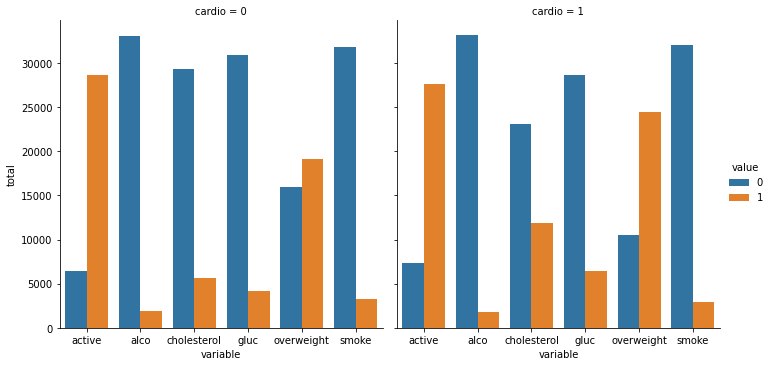

In [195]:
cat=sbn.catplot(x='variable',y='total',hue='value',col='cardio',kind='bar', data=data_cat)

In [133]:
cat.savefig('catplot.png')

In [154]:
data_heat=data[(data['ap_lo'] <= data['ap_hi'])
          & (data['height'] >= data['height'].quantile(0.025)) 
          & (data['height'] <= data['height'].quantile(0.975)) 
          & (data['weight'] >= data['weight'].quantile(0.025)) 
          & (data['weight'] <= data['weight'].quantile(0.975))]
data_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [196]:
mat=data_heat.corr() #makes correlation matrix

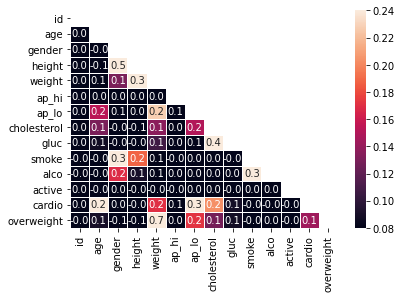

In [197]:
fig= sbn.heatmap(mat,fmt='.1f',annot=True,vmax=0.24,vmin=0.08,linecolor='white',linewidth=1,mask=np.triu(mat)).figure 

In [187]:
fig.savefig('Heatmap.png')

https://replit.com/@ShefaliDhingra/boilerplate-medical-data-visualizer-3#medical_data_visualizer.py